In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [36]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=50

In [37]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
        "PlantVillage",
        shuffle = True,
        image_size = (IMAGE_SIZE, IMAGE_SIZE),
        batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [38]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

In [9]:
for image_batch, lable_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


(-0.5, 255.5, 255.5, -0.5)

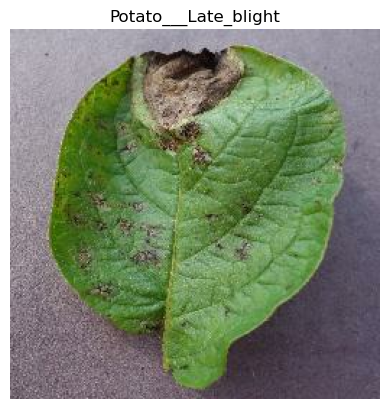

In [39]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))  # matplotlib - to visualise this array. 
    plt.title(class_names[label_batch[0]]) # to display the label
plt.axis("off") # to remove axis numbers

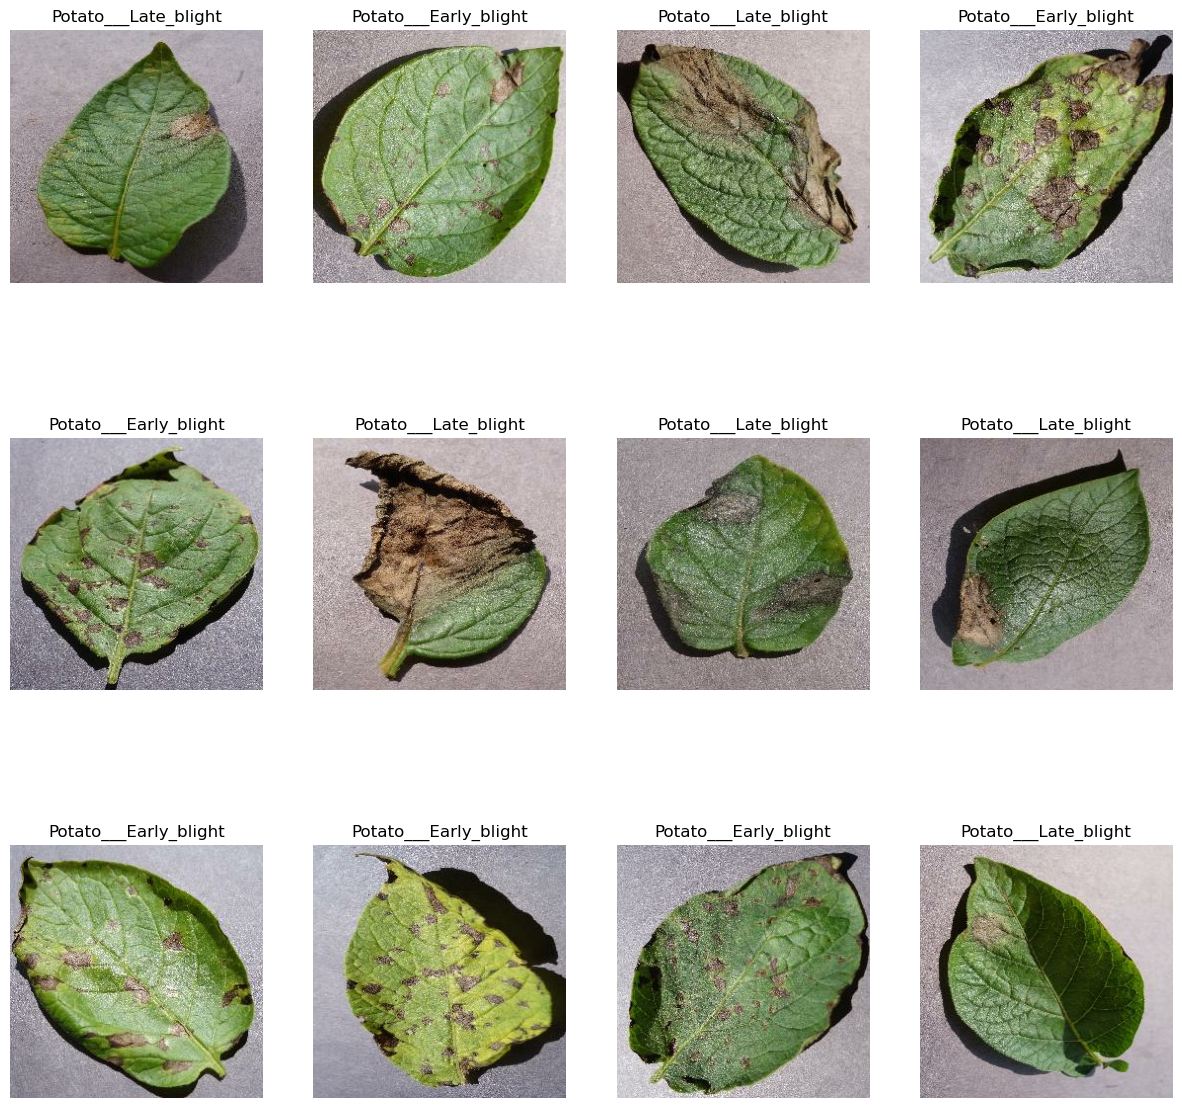

In [40]:
plt.figure(figsize = (15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # matplotlib - to visualise this array. 
        plt.title(class_names[label_batch[i]]) # to display the label
        plt.axis("off") # to remove axis numbers

In [41]:
EPOCHS = 50

In [42]:
len(dataset)

68

In [14]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [43]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [44]:
train_ds = dataset.take(54)
len(train_ds)

54

In [45]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [46]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [47]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [48]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [49]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds =  ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [50]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [51]:
len(train_ds)

54

In [52]:
len(val_ds)

6

In [53]:
len(test_ds)

8

In [54]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [55]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [62]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [63]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation ='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [66]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [67]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50


54/54 [==============================] - 38s 642ms/step - loss: 0.9473 - accuracy: 0.4688 - val_loss: 0.8390 - val_accuracy: 0.4740
Epoch 2/50
54/54 [==============================] - 37s 692ms/step - loss: 0.8293 - accuracy: 0.6244 - val_loss: 0.5593 - val_accuracy: 0.7865
Epoch 3/50
54/54 [==============================] - 36s 661ms/step - loss: 0.5443 - accuracy: 0.7784 - val_loss: 0.3294 - val_accuracy: 0.8750
Epoch 4/50
54/54 [==============================] - 35s 649ms/step - loss: 0.3648 - accuracy: 0.8484 - val_loss: 0.3910 - val_accuracy: 0.8281
Epoch 5/50
54/54 [==============================] - 35s 645ms/step - loss: 0.3293 - accuracy: 0.8594 - val_loss: 0.2288 - val_accuracy: 0.9062
Epoch 6/50
54/54 [==============================] - 35s 648ms/step - loss: 0.2390 - accuracy: 0.9057 - val_loss: 0.6616 - val_accuracy: 0.7552
Epoch 7/50
54/54 [==============================] - 35s 644ms/step - loss: 0.3162 - accuracy: 0.8796 - val_loss: 0.2148 - val_accuracy: 0.91

In [68]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 125ms/step - loss: 0.0125 - accuracy: 0.9922


In [69]:
scores

[0.012526584789156914, 0.9921875]

In [70]:
history

In [71]:
 history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [72]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [73]:
history.history['accuracy']

[0.46875,
 0.6244212985038757,
 0.7783564925193787,
 0.8483796119689941,
 0.859375,
 0.9056712985038757,
 0.8796296119689941,
 0.9131944179534912,
 0.9016203880310059,
 0.9288194179534912,
 0.9386574029922485,
 0.9398148059844971,
 0.9548611044883728,
 0.9537037014961243,
 0.9635416865348816,
 0.9618055820465088,
 0.9577546119689941,
 0.9785879850387573,
 0.9803240895271301,
 0.9774305820465088,
 0.9826388955116272,
 0.9762731194496155,
 0.9762731194496155,
 0.9849537014961243,
 0.9768518805503845,
 0.9803240895271301,
 0.9878472089767456,
 0.9855324029922485,
 0.9774305820465088,
 0.9774305820465088,
 0.9936342835426331,
 0.9872685074806213,
 0.9866898059844971,
 0.9866898059844971,
 0.9855324029922485,
 0.9936342835426331,
 0.9936342835426331,
 0.9890046119689941,
 0.984375,
 0.9890046119689941,
 0.9907407164573669,
 0.9901620149612427,
 0.9959490895271301,
 0.9600694179534912,
 0.9814814925193787,
 0.9901620149612427,
 0.9936342835426331,
 0.9976851940155029,
 0.9861111044883728,
 0

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

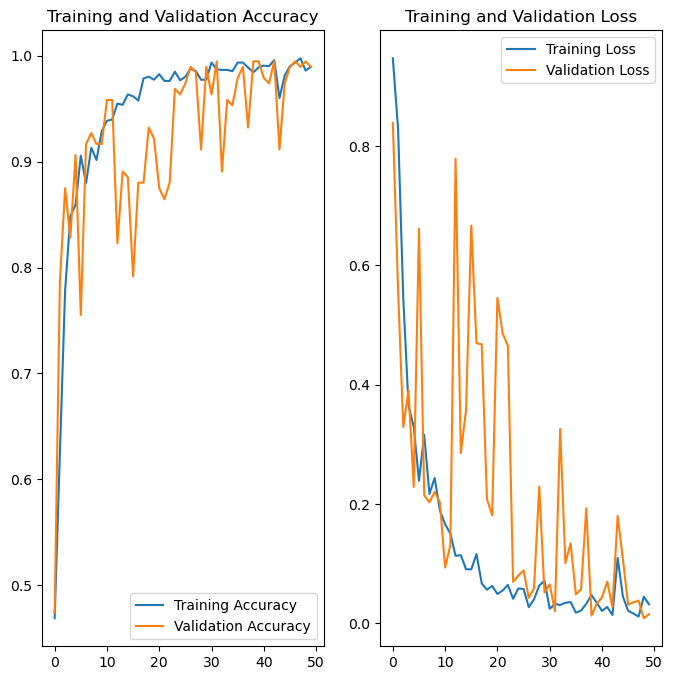

In [77]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 144ms/step
predicted label: Potato___Late_blight


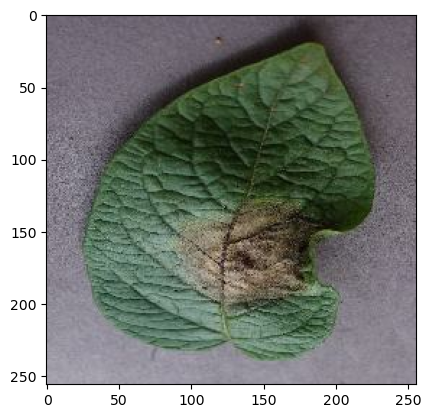

In [83]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [84]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 9ms/step


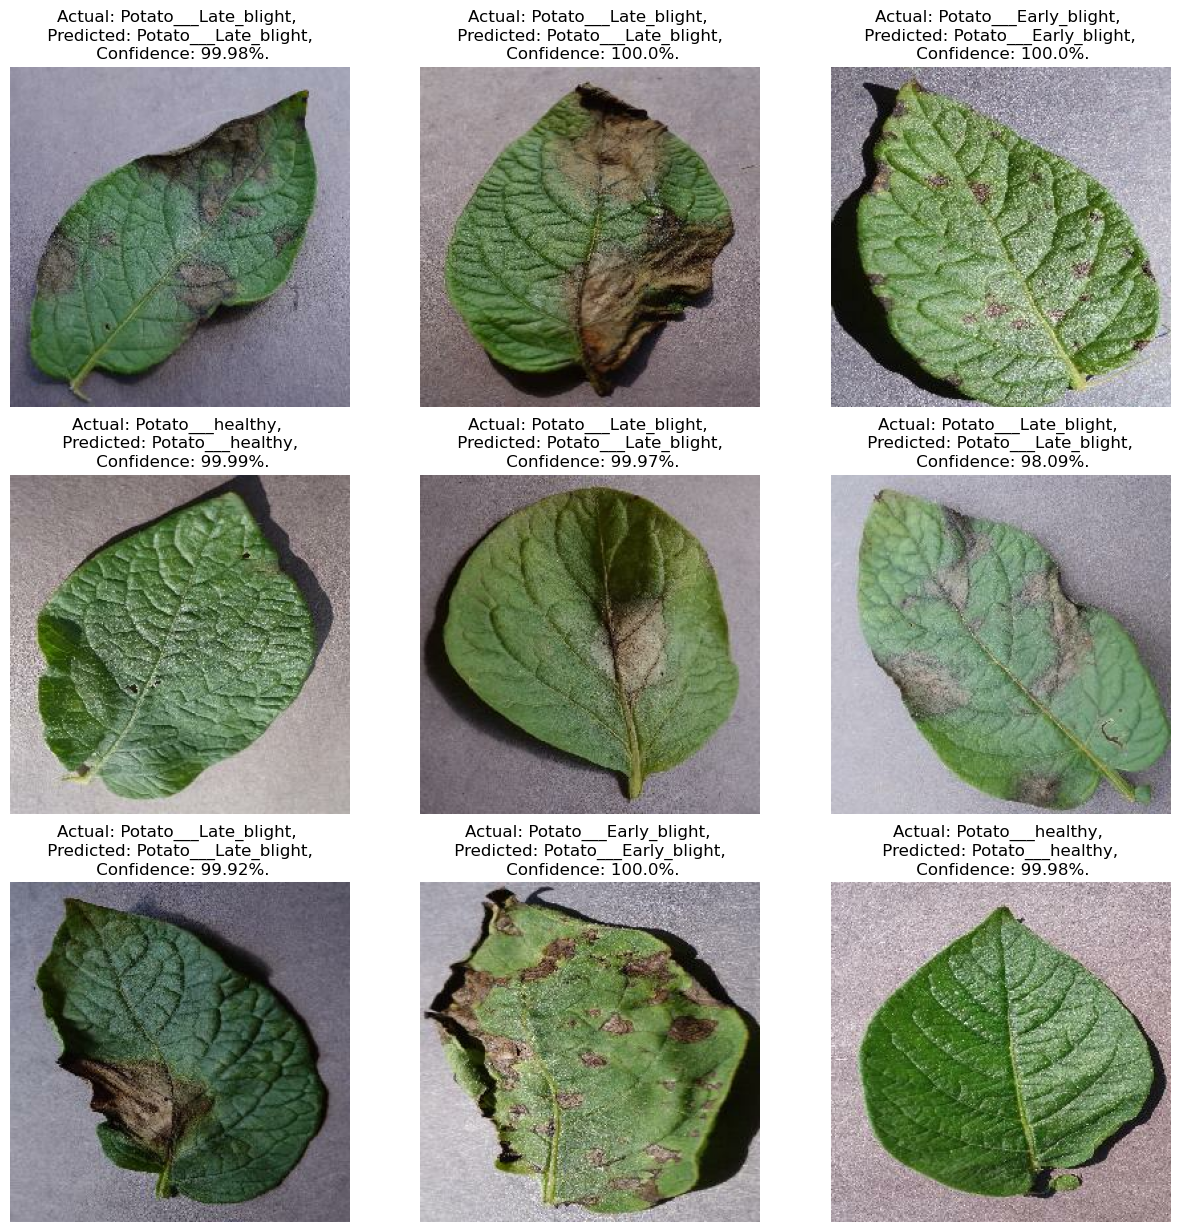

In [88]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%.")
        
        plt.axis("off")

In [89]:
# video 3
model_version = 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
